# Classification Models
### Target: UsageClass
--------

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [2]:
sampleDF = pd.read_csv('Data/sampleDF.csv')
sampleDF.head(2)

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,_Season,_check_eq_publ
0,Digital,Freegal,SONG,2018,2,1,The Music Of The Night,Susan Boyle feat. Michael Crawford,Unknown,Unknown,9999,Winter,No
1,Digital,Freegal,SONG,2017,7,1,Opaline,Dishwalla,Unknown,Unknown,9999,Summer,No


In [103]:
sampleDF.shape

(100000, 13)

In [3]:
from sklearn import preprocessing

In [4]:
#Function to label encode categories in a Dataframe

def encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [5]:
df_encoded, _ = encode_features(sampleDF)
df_encoded.head()

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,_Season,_check_eq_publ
0,0,0,15,2018,2,1,67551,32401,58248,11309,9999,3,0
1,0,0,15,2017,7,1,48784,8688,58248,11309,9999,2,0
2,1,2,18,2013,5,1,26636,23197,44689,1905,9999,1,0
3,1,2,2,2006,7,1,20272,27240,58248,7542,9999,2,0
4,1,2,2,2015,4,2,3782,8508,53849,4830,2010,1,0


<p>UsageClass: </p>
<p>     0 -> Digital </p>
<p>     1 -> Physiccal </p>

## Define X and y

In [74]:
X = df_encoded.iloc[:,1:13]
X.head(2)

,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,_Season,_check_eq_publ
0,0,15,2018,2,1,67551,32401,58248,11309,9999,3,0
1,0,15,2017,7,1,48784,8688,58248,11309,9999,2,0


In [75]:
y = df_encoded.UsageClass

In [76]:
len(y)

100000

## Normalization

In [77]:
for col in X.columns:
    X[col] = (X[col]-min(X[col]))/ (max(X[col]) - min(X[col]))

X.head()

,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,_Season,_check_eq_publ
0,0.0,0.625000,0.928571,0.090909,0.000000,0.741675,0.874214,0.921821,0.907697,1.000000,1.000000,0.0
1,0.0,0.625000,0.857143,0.545455,0.000000,0.535623,0.234412,0.921821,0.907697,1.000000,0.666667,0.0
2,0.5,0.750000,0.571429,0.363636,0.000000,0.292449,0.625880,0.707239,0.152902,1.000000,0.333333,0.0
3,0.5,0.083333,0.071429,0.545455,0.000000,0.222576,0.734965,0.921821,0.605346,1.000000,0.666667,0.0
4,0.5,0.083333,0.714286,0.272727,0.002439,0.041524,0.229555,0.852203,0.387672,0.020235,0.333333,0.0


--------

In [24]:
import matplotlib.pyplot as plt

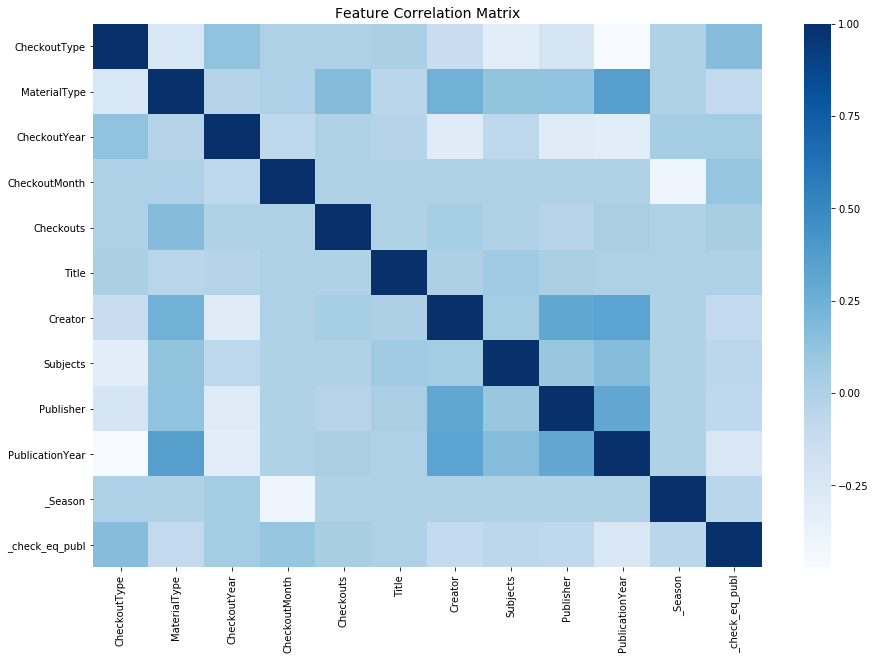

In [79]:
fig, ax = plt.subplots(figsize=(15,10))         

# Imbalanced DataFrame Correlation
corr = X.corr()
sns.heatmap(corr, cmap='Blues', annot_kws={'size':30}, ax=ax)
ax.set_title("Feature Correlation Matrix", fontsize=14)

plt.show()

### Automatic Feature Selection: identify features that are noninformative and remove them

Univariate statistics, shows if there is statistically significance relationship between each feature and the target variable. Each feature is considered individually. 

In [55]:
from sklearn.feature_selection import SelectPercentile

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [81]:
# select 50% of the features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

#transform training set
X_train_selected = select.transform(X_train)

print('X_train.shape: {}'.format(X_train.shape))
print('X_train_selected.shape: {}'.format(X_train_selected.shape))

X_train.shape: (75000, 12)
X_train_selected.shape: (75000, 6)


[ True False  True False False False  True  True False  True False  True]


([], <a list of 0 Text yticklabel objects>)

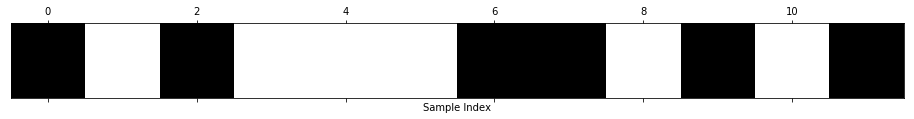

In [101]:
# visualization of features selected by SelectPercentile

mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')   #black is true, white is false
plt.xlabel('Sample Index')
plt.yticks(())

#### Compare performance on all features against the preformance using only the selected features:

In [83]:
# Transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression()

lr.fit(X_train, y_train)
print('Score with all features: {:.3f}'.format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print('Score with only selected features: {:.3f}'.format(lr.score(X_test_selected, y_test)))

Score with all features: 0.899
Score with only selected features: 0.908


In [86]:
# Create a copy of the normalized DF (X)

X2 = X.copy(deep=True)
X2.head(2)

,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,_Season,_check_eq_publ
0,0.0,0.625,0.928571,0.090909,0.0,0.741675,0.874214,0.921821,0.907697,1.0,1.000000,0.0
1,0.0,0.625,0.857143,0.545455,0.0,0.535623,0.234412,0.921821,0.907697,1.0,0.666667,0.0


In [87]:
# Drop noninformative features

X2.drop(columns=['MaterialType', 'CheckoutMonth', 'Checkouts', 'Title', 'Publisher','_Season'], axis=1, inplace=True)

In [88]:
X2.head(2)

,CheckoutType,CheckoutYear,Creator,Subjects,PublicationYear,_check_eq_publ
0,0.0,0.928571,0.874214,0.921821,1.0,0.0
1,0.0,0.857143,0.234412,0.921821,1.0,0.0



## Logistic Regression

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25)

In [90]:
# Train 
logreg = LogisticRegression(fit_intercept=False, C=1e12)    
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [91]:
# Predict
train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)

In [92]:
# Evaluation

train_acc_logreg = accuracy_score(y_train, train_pred)
test_acc_logreg = accuracy_score(y_test, test_pred)
report_logreg = classification_report(y_test, test_pred)

print('Logistic Regression Model Results')
print('----------------------------------')
print(f'Training Accuracy: {(train_acc_logreg * 100):.4}%')
print(f'Test Accuracy:     {(test_acc_logreg * 100):.4}%')

Logistic Regression Model Results
----------------------------------
Training Accuracy: 81.87%
Test Accuracy:     81.7%


In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

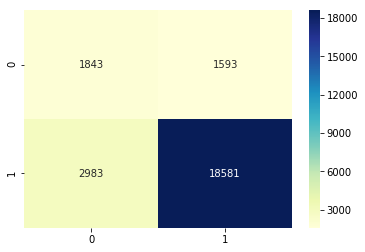

In [95]:
cnf_matrix = confusion_matrix(test_pred, y_test)
sns.heatmap(cnf_matrix, cmap="YlGnBu", fmt='.16g', annot=True);

## Support Vector Machine

In [106]:
from sklearn import svm
import seaborn as sns

In [109]:
svm = svm.SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)

svm.fit(X_train, y_train)

svm_train_preds = svm.predict(X_train)
svm_test_preds = svm.predict(X_test)

train_accuracy_svm = accuracy_score(y_train, svm_train_preds)
test_accuracy_svm = accuracy_score(y_test, svm_test_preds)
report_svm = classification_report(y_test, svm_test_preds)

In [110]:
print(f"Training Accuracy: {(train_accuracy_svm * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_svm * 100):.4}%")

Training Accuracy: 76.05%
Test Accuracy:     75.78%


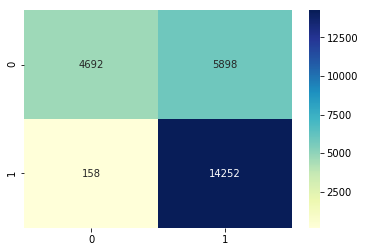

In [111]:
svm_matrix = confusion_matrix(svm_test_preds, y_test)
sns.heatmap(svm_matrix, cmap="YlGnBu", fmt='.16g', annot=True);

## KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
neigh = KNeighborsClassifier(algorithm='auto', weights='distance')

neigh.fit(X_train, y_train)

neigh_train_preds = neigh.predict(X_train)
neigh_test_preds = neigh.predict(X_test)

neigh_accuracy = accuracy_score(y_train, neigh_train_preds)
neigh_accuracy = accuracy_score(y_test, neigh_test_preds)
report_neigh = classification_report(y_test, neigh_test_preds)

In [133]:
print(f"Training Accuracy: {(neigh_accuracy * 100):.4}%")
print(f"Test Accuracy:     {(neigh_accuracy * 100):.4}%")

Training Accuracy: 100.0%
Test Accuracy:     100.0%


Accuracy can be misleading, there is a large class imbalance in this set, these models predicted the value of the majority class for all predictions and achieve a high classification accuracy or an accuracy of 100%, the problem is that they are not useful for our domain.

## Class Imbalance
#### Oversampling UsageClass feature

More balanced predictions are made when oversampling (making copies of the minority class)


In [96]:
from imblearn.over_sampling import SMOTE

In [115]:
# previous class distribution
print(df_encoded['UsageClass'].value_counts()) 

# resample data ONLY using training data
X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train) 

# synthetic sample class distribution
print(pd.Series(y_resampled).value_counts())

1    80539
0    19461
Name: UsageClass, dtype: int64
1    60389
0    60389
dtype: int64


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)


## Logistic Regression

In [117]:
logreg2 = LogisticRegression()

# train
logreg2.fit(X_train, y_train)

# predict
train_preds = logreg2.predict(X_train)
test_preds = logreg2.predict(X_test)

# evaluate
train_accuracy_logreg2 = accuracy_score(y_train, train_preds)
test_accuracy_logreg2 = accuracy_score(y_test, test_preds)
report_logreg2 = classification_report(y_test, test_preds)

print("Logistic Regression with balanced classes")
print("------------------------")
print(f"Training Accuracy: {(train_accuracy_logreg2 * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_logreg2 * 100):.4}%")

Logistic Regression with balanced classes
------------------------
Training Accuracy: 77.91%
Test Accuracy:     77.91%


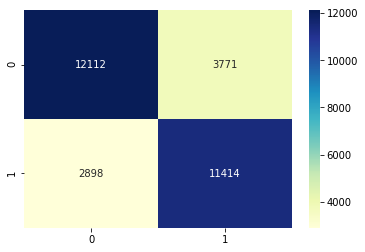

In [118]:
cnf_matrix = confusion_matrix(test_preds, y_test)
sns.heatmap(cnf_matrix, cmap="YlGnBu", fmt='.16g', annot=True);

## Support Vector Machine

In [120]:
from sklearn import svm

svm = svm.SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)

svm.fit(X_train, y_train)

svm_train_preds = svm.predict(X_train)
svm_test_preds = svm.predict(X_test)

train_accuracy_svm = accuracy_score(y_train, svm_train_preds)
test_accuracy_svm = accuracy_score(y_test, svm_test_preds)
report_svm = classification_report(y_test, svm_test_preds)

print(f"Training Accuracy: {(train_accuracy_svm * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_svm * 100):.4}%")

Training Accuracy: 84.52%
Test Accuracy:     84.56%


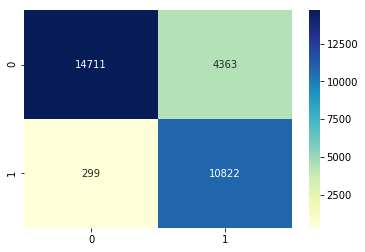

In [121]:
svm_matrix = confusion_matrix(svm_test_preds, y_test)
sns.heatmap(svm_matrix, cmap="YlGnBu", fmt='.16g', annot=True);

## KNN

In [130]:
neigh = KNeighborsClassifier(algorithm='auto', weights='distance')

neigh.fit(X_train, y_train)

neigh_train_preds = neigh.predict(X_train)
neigh_test_preds = neigh.predict(X_test)

neigh_accuracy = accuracy_score(y_train, neigh_train_preds)
neigh_accuracy = accuracy_score(y_test, neigh_test_preds)
report_neigh = classification_report(y_test, neigh_test_preds)

print(f"Training Accuracy: {(neigh_accuracy * 100):.4}%")
print(f"Test Accuracy:     {(neigh_accuracy * 100):.4}%")

Training Accuracy: 100.0%
Test Accuracy:     100.0%


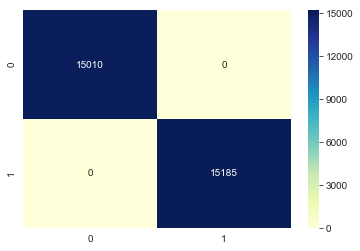

In [131]:
knn_matrix = confusion_matrix(neigh_test_preds, y_test)
sns.heatmap(knn_matrix, cmap="YlGnBu", fmt='.16g', annot=True);


### Classification Report Analysis

Accuracy is not the metric to use when working with an imbalanced dataset. 
By looking at the following performance measures we can get more insight into the accuracy of the model than traditional classification accuracy:
* Confusion Matrix: A breakdown of predictions showing the correct predictions (main diagonal) and the types of incorrect predictions made (anti diagonal).
* Precision: A measure of a classifiers exactness.
* Recall: A measure of a classifiers completeness
* F1 Score (or F-score): A weighted average of precision and recall.

In [134]:
print('Classification Report for Balanced LogReg')
print(report_logreg2)
print('\n Classification Report for SVM Report:')
print(report_svm)
print('\n Classification Report for KNN Report:')
print(report_neigh)

Classification Report for Balanced LogReg
              precision    recall  f1-score   support

           0       0.76      0.81      0.78     15010
           1       0.80      0.75      0.77     15185

   micro avg       0.78      0.78      0.78     30195
   macro avg       0.78      0.78      0.78     30195
weighted avg       0.78      0.78      0.78     30195


 Classification Report for SVM Report:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86     15010
           1       0.97      0.71      0.82     15185

   micro avg       0.85      0.85      0.85     30195
   macro avg       0.87      0.85      0.84     30195
weighted avg       0.87      0.85      0.84     30195


 Classification Report for KNN Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15010
           1       1.00      1.00      1.00     15185

   micro avg       1.00      1.00      1.00     30195
   mac

As we see in the report, Logistic Regression and SVM models do a better job classifying digital content, altought physical checkouts are the majority when looking at the inabalanced set. The KNN model is not a reliable source as it has a perfect classification.

Let's look at the ROC Curves to have a better sence of the tradeoffs between true positives and false positive rates. 

## Performance metrics

Two diagnostic tools that help in the interpretation of probabilistic forecast for binary (two-class) classification predictive modeling problems are ROC Curves and Precision-Recall curves. Since I already balanced the observations I will use the Receiver Operating Characteristic curve, <b>ROC</b>, to summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

In [127]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

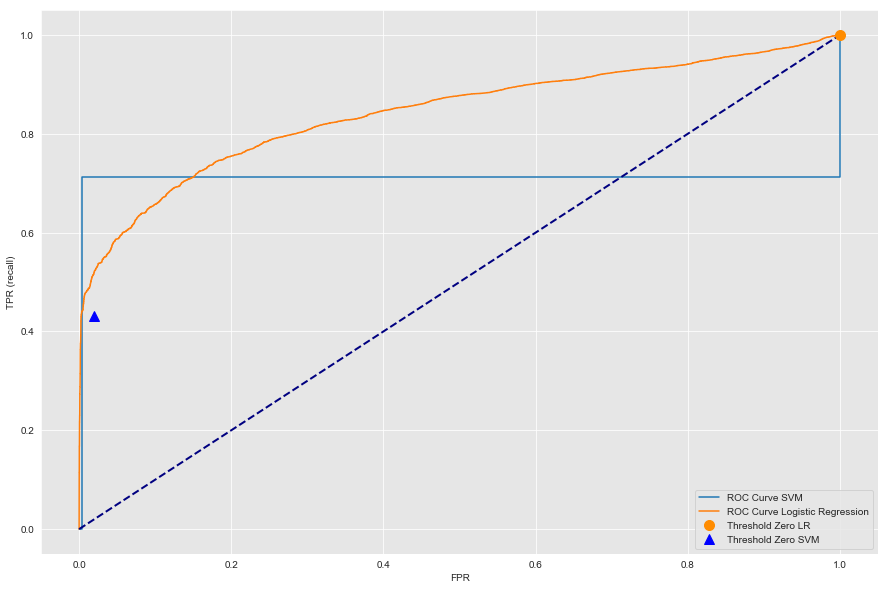

In [160]:
plt.figure(figsize=(15,10))

fpr_svm, tpr_svm, tresholds_svm = roc_curve(y_test, svm.decision_function(X_test))
fpr_lr, tpr_lr, tresholds_lr = roc_curve(y_test, logreg2.predict_proba(X_test)[:, 1])

#find the threshold closet to zero
close_zero_lr = np.argmin(np.abs(tresholds_lr))
close_zero_svm = np.argmin(np.abs(tresholds_svm))

plt.plot(fpr_svm, tpr_svm, label='ROC Curve SVM')
plt.plot(fpr_lr, tpr_lr, label='ROC Curve Logistic Regression')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR (recall)')
plt.plot(fpr_lr[close_zero_lr], tpr_lr[close_zero_lr], 'o', markersize=10, label='Threshold Zero LR', color='darkorange')
plt.plot(fpr_svm[close_zero_svm], tpr_lr[close_zero_svm], '^', markersize=10, label='Threshold Zero SVM', color='blue')

plt.legend(loc=4)


In [158]:
from sklearn.metrics import roc_auc_score
lr_auc = roc_auc_score(y_test, logreg2.predict_proba(X_test)[:, 1])
svm_auc = roc_auc_score(y_test, svm.decision_function(X_test))
print('AUC for Logistic Regression: {:3f}'.format(lr_auc))
print('AUC for SVM: {:.3f}'.format(svm_auc))
                        

AUC for Logistic Regression: 0.842273
AUC for SVM: 0.710


#### ROC curve for Logistic Regression train and test sets  

Test AUC: 0.8422726809061767
Train AUC: 0.8406669279706113


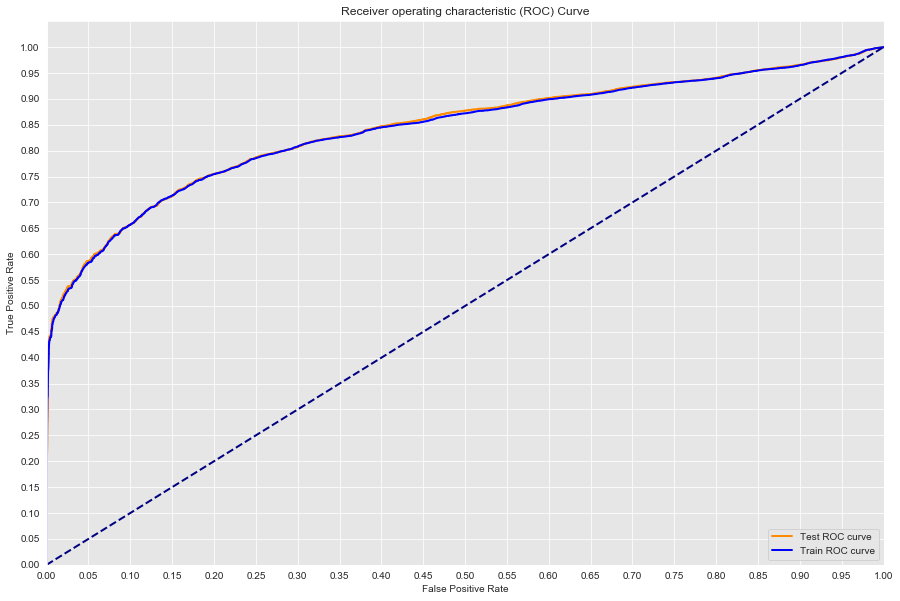

In [129]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

y_test_score = logreg2.decision_function(X_test)
y_train_score = logreg2.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))

plt.figure(figsize=(15,10))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange', lw=lw, label='Test ROC curve')
plt.plot(train_fpr, train_tpr, color='blue',lw=lw, label='Train ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

The ROC curve is a useful tool for a few reasons:

The area under the curve (AUC) can be used as a summary of the model skill.

The shape of the curve contains the expected false positive rate, and the false negative rate:

* Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
* Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.